### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助你：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(agent101)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate agent101

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "agent101" ]; then
    echo "✅ 当前单元格已成功激活到 agent101 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(agent101)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate agent101"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进程) ==
✅ 当前单元格已成功激活到 agent101 环境。
✅ 正在使用的环境路径: /root/miniconda3/envs/agent101

💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter��核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。


In [2]:
# 2. 设置pip 为清华源
%pip config list -v set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list -v list


For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart the kernel to use updated packages.
For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart th

In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助你：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                               |
|:-------------|:-----------------------------------------------------------------------------------|
| 操作系统     | Linux Ubuntu 22.04.4 LTS                                                           |
| CPU 信息     | 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz (1 physical cores, 4 logical cores) |
| 内存信息     | 5.75 GB (Available: 1.77 GB)                                                       |
| GPU 信息     | No GPU found (nvidia-smi not found)                                                |
| CUDA 信息    | CUDA not found                                                                     |
| Python 版本  | 3.10.18                                                                            |
| Conda 版本   | conda 24.4.0                                         

## 什么是 LangGraph？

[LangGraph](https://langchain-ai.github.io/langgraph/) 是由 LangChain 团队开源的框架，用于基于大语言模型（LLM）构建复杂、有状态的多智能体应用。LangGraph 内置了持久化能力，可保存与恢复状态，从而支持错误恢复与包含“人机交互”（Human-in-the-loop, HITL）的工作流。

## 本实践手册的目标

本手册演示如何借助 [Langfuse](https://langfuse.com/docs)，通过其与 [LangChain 的集成](https://langfuse.com/integrations/frameworks/langchain)，对你的 LangGraph 应用进行调试、分析与迭代优化。

**完成本手册后，你将能够：**

- 自动通过 Langfuse 集成对 LangGraph 应用进行追踪（tracing）
- 监控复杂的多智能体（multi-agent）方案
- 添加评分（例如用户反馈）


## 初始化 Langfuse

在 Langfuse 控制台项目设置页获取你的 [API 密钥](https://langfuse.com/faq/all/where-are-langfuse-api-keys)，并将其加入到运行环境变量中以初始化 Langfuse 客户端。

<!-- CALLOUT_START type: "info" emoji: "⚠️" -->
_**注意：** 本笔记使用 Langfuse Python SDK v3。_
<!-- CALLOUT_END -->

<!-- CALLOUT_START type: "info" emoji: "ℹ️" -->
_**注意：** 需要至少 Python 3.11（参见 [GitHub Issue](https://github.com/langfuse/langfuse/issues/1926)）。_
<!-- CALLOUT_END -->

In [5]:
%pip install langfuse==3.3.0 langchain==0.3.27 langchain-openai==0.3.31 langchain_community==0.3.27 langgraph==0.6.7

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


在 Langfuse 控制台的项目设置页获取 API Key，初始化 Langfuse 客户端，并将其设置到环境变量中。

In [6]:
# 🔐 环境变量配置 - 安全存储敏感信息
# 环境变量是存储API密钥等敏感信息的优秀做法
# 避免在代码中硬编码密钥，防止泄露

import os, getpass

def _set_env(var: str):
    """
    安全地设置环境变量
    如果环境变量不存在，会提示用户输入
    使用getpass模块隐藏输入内容，防止密码泄露
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 🤖 OpenAI API 配置
# OpenAI API密钥：从 https://platform.openai.com/api-keys 获取
# 这是调用GPT模型必需的认证信息
_set_env("OPENAI_API_KEY")

# API代理地址：如果你使用第三方代理服务（如国内代理）
# 示例：https://api.apiyi.com/v1
# 如果直接使用OpenAI官方API，可以留空
_set_env("OPENAI_BASE_URL")

# 🌐 Langfuse 配置
# Langfuse是一个可观测性平台，需要注册账户获取密钥
# 注册地址：https://cloud.langfuse.com

# 公开密钥：用于标识你的项目
_set_env("LANGFUSE_PUBLIC_KEY")

# 秘密密钥：用于认证，请妥善保管
_set_env("LANGFUSE_SECRET_KEY")

#  设置基础 URL
# 🇪🇺 欧盟区域(推荐) https://cloud.langfuse.com
# 🇺🇸 美国区域 https://us.cloud.langfuse.com
# 本地测试地址：http://192.168.172.128:3000
_set_env("LANGFUSE_BASE_URL")
# 兼容老版本的基础 URL
_set_env("LANGFUSE_HOST")

# 💡 初学者提示：
# 1. 环境变量存储在操作系统中，重启后需要重新设置
# 2. 生产环境中建议使用.env文件或云服务配置
# 3. 永远不要在代码中硬编码API密钥！


在环境变量设置完成后，我们即可初始化 Langfuse 客户端。`get_client()` 会使用环境变量中提供的凭据来初始化 Langfuse 客户端。

In [7]:
from langfuse import get_client

# 🚀 初始化 Langfuse 客户端
# get_client() 会自动读取环境变量中的配置信息
langfuse = get_client()

# 🔍 验证客户端连接状态
# 这个步骤非常重要，确保后续的追踪功能能够正常工作
if langfuse.auth_check():
    print("✅ Langfuse 客户端已通过身份验证，准备就绪！")
    print("🔧 现在可以开始使用追踪功能了")
else:
    print("❌ 身份验证失败！")
    print("🔍 请检查以下配置项：")
    print("   - LANGFUSE_PUBLIC_KEY 是否正确")
    print("   - LANGFUSE_SECRET_KEY 是否正确")
    print("   - LANGFUSE_HOST 是否可访问")
    print("   - 网络连接是否正常")

✅ Langfuse 客户端已通过身份验证，准备就绪！
🔧 现在可以开始使用追踪功能了


## 使用 LangGraph 构建简单聊天应用

**本节将完成：**

- 在 LangGraph 中构建一个可回答常见问题的客服聊天机器人
- 使用 Langfuse 对机器人的输入与输出进行追踪（tracing）

我们先从一个基础机器人入手，随后扩展为更高级的多智能体（multi-agent）设置，并在过程中介绍关键的 LangGraph 概念。

### 创建智能体（Agent）

首先创建一个 `StateGraph`。`StateGraph` 定义了聊天机器人的状态机结构。我们会添加节点来表示 LLM 以及机器人可调用的函数，并通过边（edge）定义机器人在这些函数之间的状态流转。

In [8]:
# 🔧 导入 LangGraph 构建智能体所需的核心模块
from typing import Annotated
from langchain_openai import ChatOpenAI  # OpenAI 聊天模型
from langchain_core.messages import HumanMessage  # 人类消息类型
from typing_extensions import TypedDict  # 类型化字典
from langgraph.graph import StateGraph  # LangGraph 状态图
from langgraph.graph.message import add_messages  # 消息添加函数

# 📋 定义智能体的状态结构
# State 是一个类型化字典，定义了智能体在执行过程中需要维护的状态信息
class State(TypedDict):
    # 💬 消息列表：存储对话历史
    # Annotated[list, add_messages] 的含义：
    # - list: 消息的数据类型是列表
    # - add_messages: 指定状态更新策略，新消息会追加到列表末尾而不是覆盖整个列表
    # 这种设计确保了对话历史的完整保存
    messages: Annotated[list, add_messages]

# 🏗️ 创建状态图构建器
# StateGraph 是 LangGraph 的核心组件，用于定义智能体的工作流程
graph_builder = StateGraph(State)

# 🤖 初始化语言模型
# 选择 GPT-4o 模型，temperature=0.2 确保输出相对稳定但仍有一定创造性
llm = ChatOpenAI(model="gpt-4o", temperature=0.2)

# 🔄 定义聊天机器人节点函数
# 这是 LangGraph 节点函数的基本模式：接收当前状态，返回更新后的状态
def chatbot(state: State):
    """
    聊天机器人节点的核心逻辑

    参数:
        state (State): 当前的智能体状态，包含消息历史

    返回:
        dict: 包含新生成消息的状态更新

    工作流程:
    1. 获取当前的消息历史
    2. 将消息历史发送给语言模型
    3. 接收模型生成的回复
    4. 将回复包装成状态更新返回
    """
    # 调用语言模型处理当前对话历史，生成回复
    response = llm.invoke(state["messages"])

    # 返回状态更新：将模型的回复添加到消息列表中
    return {"messages": [response]}

# 🔗 向图中添加"chatbot"节点
# 节点代表工作单元，通常是普通的 Python 函数
# 每个节点负责特定的处理逻辑，如调用 LLM、处理工具、数据转换等
graph_builder.add_node("chatbot", chatbot)

# 🚀 设置图的入口点
# 告诉图每次运行时从哪个节点开始执行
# 在这个简单示例中，我们直接从 chatbot 节点开始
graph_builder.set_entry_point("chatbot")

# 🏁 设置图的结束点
# 指示图"当这个节点运行完成后，可以退出执行"
# 对于简单的单轮对话，chatbot 节点执行完就可以结束
graph_builder.set_finish_point("chatbot")

# ⚙️ 编译图形为可执行对象
# compile() 方法将图构建器转换为 CompiledGraph
# CompiledGraph 是可以实际运行的图形对象，支持 invoke、stream 等方法
graph = graph_builder.compile()

# 💡 理解 LangGraph 的核心概念：
# 🏗️ StateGraph: 定义智能体的状态和工作流程
# 🔄 Node: 执行具体任务的函数，如调用 LLM、使用工具等
# 🔗 Edge: 连接节点，定义执行顺序和条件跳转
# 📊 State: 智能体运行过程中维护的数据结构
# ⚙️ CompiledGraph: 编译后的可执行图形对象

### 在调用时添加 Langfuse 回调

现在，为了追踪应用执行过程，我们将添加 [面向 LangChain 的 Langfuse 回调处理器](https://langfuse.com/integrations/frameworks/langchain)：`config={"callbacks": [langfuse_handler]}`

In [9]:
from langfuse.langchain import CallbackHandler

# 🛎️ 初始化 Langfuse 回调处理器
# 该处理器会自动捕获 LangChain/LangGraph 的执行细节，用于：
# - 🕒 记录每个节点的耗时与延迟
# - 📝 保存输入、输出及中间状态
# - 💰 统计 token 消耗和 API 调用成本
# - 🐞 收集异常信息，便于排错
# - 📈 在 Langfuse 中生成可视化调用链
langfuse_handler = CallbackHandler()

# 🚀 运行智能体并启用 Langfuse 追踪
print("🤖 智能体开始运行，正在处理问题……")
print("❓ 用户提问：什么是 Langfuse？")
print("📋 执行过程:")

# 使用 stream 方法可以实时查看智能体的执行步骤：
# - graph.stream(...) 会在每个节点完成后产生一次增量输出（生成器）
# - config={"callbacks": [langfuse_handler]} 确保每一步都写入 Langfuse
# - 适合本地调试/教学演示，清晰观察逐步推理过程与耗时
for step_result in graph.stream(
    {"messages": [HumanMessage(content="什么是 Langfuse？请详细介绍其主要功能和典型应用场景。")]},
    config={"callbacks": [langfuse_handler]}
):
    # 提示：step_result 的结构类似 {"chatbot": {"messages": [...]}}，
    # 你可以在此对中间结果执行断言/日志上报，构建更稳健的测试与可观测性
    print(f"📤 节点执行结果：{step_result}")

# 结束提示：在 Langfuse 控制台可查看完整调用链、耗时、token 成本等
print("✅ 智能体执行完成！")
print("🔍 请前往 Langfuse 控制台查看完整的追踪记录。")

🤖 智能体开始运行，正在处理问题……
❓ 用户提问：什么是 Langfuse？
📋 执行过程:
📤 节点执行结果：{'chatbot': {'messages': [AIMessage(content='Langfuse 是一个专为构建和监控基于大语言模型（LLM）的应用程序而设计的开源工具。它帮助开发者更高效地调试、优化和监控与 LLM 相关的工作流，尤其是在构建复杂的对话系统、生成式 AI 应用或其他需要多步推理的场景中。\n\n以下是 Langfuse 的主要功能和典型应用场景的详细介绍：\n\n---\n\n### **主要功能**\n\n1. **请求和响应跟踪**\n   - Langfuse 能够记录每一次与 LLM 的交互，包括输入的提示（prompt）和模型生成的响应。这种详细的日志记录有助于开发者了解模型的行为，并快速定位问题。\n\n2. **多步工作流可视化**\n   - 对于复杂的应用程序（如链式调用或多步骤推理），Langfuse 提供了清晰的可视化工具，帮助开发者跟踪每一步的执行情况。这对于调试和优化复杂的 LLM 应用至关重要。\n\n3. **性能监控**\n   - Langfuse 提供了对模型性能的监控功能，包括响应时间、错误率、成功率等指标。这些数据可以帮助开发者评估模型的稳定性和效率。\n\n4. **版本管理**\n   - Langfuse 支持对模型和提示的版本进行管理。开发者可以比较不同版本的效果，快速找到最佳的提示设计或模型配置。\n\n5. **用户行为分析**\n   - Langfuse 可以记录用户与应用的交互数据，帮助开发者了解用户行为，从而优化应用的用户体验。\n\n6. **错误捕获与调试**\n   - 当模型生成错误或不符合预期的结果时，Langfuse 提供了详细的错误日志和上下文信息，帮助开发者快速定位问题并修复。\n\n7. **集成与扩展性**\n   - Langfuse 可以与常见的 LLM 提供商（如 OpenAI、Anthropic、Cohere 等）以及流行的框架（如 LangChain）无缝集成。此外，它还支持通过 API 与其他工具或系统进行扩展。\n\n---\n\n### **典型应用场景**\n\n1. **对话式 AI 应用**\n   - 在构建聊天机器人或虚拟

![在 Langfuse 中查看聊天应用的追踪](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202511261635006.png)

### 可视化聊天应用

你可以使用 `get_graph` 方法配合相应的 “draw” 方法对图进行可视化。

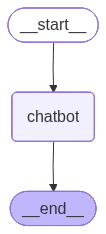

In [10]:
from IPython.display import Image, display
# 可视化当前图（graph）：有助于直观理解节点与执行顺序
# 若图较大，可改用 draw_mermaid_file() 输出到文件或 draw_mermaid_svg() 生成矢量图
display(Image(graph.get_graph().draw_mermaid_png()))

### 在 LangGraph Server 中使用 Langfuse

#### 🖥️ LangGraph Server 简介

[LangGraph Server](https://langchain-ai.github.io/langgraph/concepts/langgraph_server/) 是 LangGraph 提供的服务器部署方案，用于将本地构建的图工作流发布为可扩展的在线服务，具备以下能力：

- 🌐 **HTTP API 接口**：将 LangGraph 智能体封装为 REST API，便于与业务系统集成
- 🚀 **生产级运行**：支持高并发、负载均衡与容器化交付
- 🔧 **运维友好**：自动处理请求路由、状态恢复与错误重试
- 📊 **监控集成**：兼容主流监控与追踪体系，便于观测运行状况
- 🔒 **安全管控**：内置身份认证与授权机制，满足企业安全需求

#### 💡 为什么要在 Server 环境接入 Langfuse？

- 🏭 **生产可观测性**：实时查看线上请求的调用链与状态
- 🐛 **远程调试**：无需复现场景即可还原问题细节
- 📈 **性能洞察**：量化每个节点的耗时与成本
- 💰 **费用治理**：准确统计第三方 API 的调用量与费用
- 👥 **团队协作**：共享追踪记录，支持跨职能协同排查


#### 🔧 配置方法说明

使用 LangGraph Server 时，智能体图的调用由服务器自动处理，用户无法在每次请求时手动指定回调处理器。

**关键差异：**
- 🏠 **本地开发**：可以在每次调用时添加 `config={"callbacks": [langfuse_handler]}`
- 🖥️ **服务器部署**：需要在图编译时预先配置回调处理器

**解决方案：**
在声明和编译图时就添加 Langfuse 回调，这样服务器上的所有请求都会自动启用追踪功能。

In [11]:
# 🔧 导入服务器部署所需的模块
# 初学者须知：本节示例面向“部署到 LangGraph Server（或任何持久化服务端）”场景，
# 重点在于将追踪回调“静态注入”到图对象中，确保线上每个请求都被自动追踪。
from typing import Annotated
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langfuse.langchain import CallbackHandler

# 📋 定义与前文一致的智能体状态结构
# - State 是图的“共享黑板”，所有节点通过它传递数据
# - messages 字段使用 add_messages 策略：新消息在运行中会被“追加”，而不是覆盖
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 🏗️ 构建图形结构
# 小贴士：将最小可用功能先装成一张图，有利于后续扩展、观测与运维
graph_builder = StateGraph(State)

# 🤖 初始化语言模型
# 说明：temperature 控制随机性。生产环境若追求稳定复现，可适当降低至 0~0.2。
llm = ChatOpenAI(model="gpt-4o", temperature=0.2)

# 🔄 定义聊天机器人节点
# 约定：节点函数签名 (state) -> partial_state
# 返回值是“增量状态”（partial update），LangGraph 会据此合并到全局状态

def chatbot(state: State):
    """处理用户消息并生成回复。"""
    return {"messages": [llm.invoke(state["messages"]) ]}

# 🔗 组装图形结构
# entry_point / finish_point 分别指定起点与终点，便于 Server 判定一次执行的生命周期
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

# 🔄 初始化 Langfuse 回调处理器（服务器模式）
# 注意：在 Server 场景无法逐次在调用处传入 callbacks，需在图对象层面预配置
langfuse_handler = CallbackHandler()

# ⚙️ 编译图形并预配置回调处理器
# 🎯 核心方法：with_config()
# - compile()：编译图形，生成可执行的 CompiledGraph
# - with_config()：为编译后的图形设置默认配置（如回调处理器）
#
# 💡 工作流程：
# 1. 编译图形得到 CompiledGraph 对象
# 2. 调用 with_config() 注入 Langfuse 回调
# 3. 得到一个“默认启用追踪”的图对象，Server 直接引用即可
#
# ✅ 常见误区：
# - 在 API Handler 内再临时创建 CallbackHandler → 会导致追踪分散、不易聚合
# - 只在本地调试时传 callbacks，忘记在 Server 端注入 → 线上无追踪
#
# 🚀 优势：
# - 无需在每次请求时手动添加回调配置
# - 所有 API 请求都会自动写入 Langfuse 追踪
# - 简化生产环境的部署与运维
graph = graph_builder.compile().with_config({"callbacks": [langfuse_handler]})

# 💡 部署提示：
# - 在 LangGraph Server 中直接引用此 graph，即可立即获得完整的追踪数据
# - 如需区分环境（dev/staging/prod），可在环境变量中切换 Langfuse Host/Key；
#   但“图对象注入回调”的做法保持一致。

## 多个 LangGraph 智能体的协同

在某些架构中，一个 LangGraph 智能体会调用一个或多个其他 LangGraph 智能体。若想让整套执行链在 Langfuse 中聚合为同一条追踪，可显式传入自定义的 `trace_id`。

首先生成一个共享的 `trace_id`，供主智能体与子智能体共用，以便在 Langfuse 中合并为同一条记录。


In [12]:
from langfuse import get_client, Langfuse
from langfuse.langchain import CallbackHandler

# ✅ 初学者要点：
# - get_client() 会自动读取环境变量（LANGFUSE_PUBLIC_KEY/SECRET_KEY/HOST）进行认证
# - Langfuse.create_trace_id() 生成可跨服务复用的 trace_id，用于将多段执行“串成一条”
langfuse = get_client()

# 🔐 生成一个稳定的 trace_id（也可由上游网关/业务系统传入，实现全链路同一 Trace）
predefined_trace_id = Langfuse.create_trace_id()

# 📡 初始化 Langfuse 回调处理器，用于采集 LangChain/LangGraph 的执行数据
# 小贴士：该 handler 可复用，避免在每个请求内重复创建，减少开销
langfuse_handler = CallbackHandler()


接下来，构建子智能体的逻辑。


In [13]:
from typing import Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

# 子智能体（Sub Agent）的最小实现：仅负责根据 messages 生成一次回复
# 这样可把“研究/检索”等专项逻辑与主流程解耦，便于复用与独立观测
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# 说明：与主智能体可使用相同或不同模型；按需求选择
llm = ChatOpenAI(model = "gpt-4o", temperature = 0.2)

def chatbot(state: State):
    # LangGraph 约定：返回增量状态（只包含需要更新的键）
    return {"messages": [llm.invoke(state["messages"])]}

# 仅单节点的直通图，适合封装为工具被主流程调用
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
sub_agent = graph_builder.compile()

随后，将该子智能体封装成工具，供主流程调用并复用。


In [14]:
from langchain_core.tools import tool

@tool
def langgraph_research(question):
  """Conducts research for various topics."""

  # 关键思路：
  # - 使用 start_as_current_span 创建一个子跨度（span），并注入共享 trace_id，
  #   确保该工具内的执行与主流程聚合到同一条追踪
  with langfuse.start_as_current_span(
      name="🤖-sub-research-agent",
      trace_context={"trace_id": predefined_trace_id}
  ) as span:
      # 在进入子智能体前，将用户问题写入 trace，便于还原现场
      span.update_trace(input=question)

      # 调用子智能体；通过 callbacks 将 LangChain 级别的细节采集到 Langfuse
      response = sub_agent.invoke(
          {"messages": [HumanMessage(content = question)]},
          config={"callbacks": [langfuse_handler]}
      )

      # 返回结构是增量状态；此处取模型输出的 AI 消息作为工具答案
      # 注意：索引 1 对应追加后的第二条消息（0 为 Human，1 为 AI）
      span.update_trace(output= response["messages"][1].content)

  return response["messages"][1].content

最后，创建第二个 LangGraph 智能体，通过前面新增的 `langgraph_research` 工具完成协作。


In [15]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

# 主智能体：采用内置 ReAct 模式（推理-行动-反思），可自动选择工具
llm = ChatOpenAI(model = "gpt-4o", temperature = 0.2)

# 将子智能体封装的工具注入，主智能体即可在需要时调用
main_agent = create_react_agent(
    model=llm,
    tools=[langgraph_research]
)

In [16]:
user_question = "什么是 Langfuse？"

# 🧭 使用预生成的 trace_id（通过 trace_context 注入）
# 作用：让主/子智能体在 Langfuse 界面中聚合到同一条调用链上
with langfuse.start_as_current_span(
    name="🤖-main-agent",
    trace_context={"trace_id": predefined_trace_id}
) as span:
    # 记录入口输入，方便运维人员复盘
    span.update_trace(input=user_question)

    # 此处的 LangChain 执行都会归属于同一条追踪
    response = main_agent.invoke(
        {"messages": [{"role": "user", "content": user_question}]},
        config={"callbacks": [langfuse_handler]}
    )

    # 记录最终输出，可配合评分（Score）进行质量分析
    span.update_trace(output=response["messages"][1].content)

print(f"Trace ID: {predefined_trace_id}")  # 可在后续评分或排查时使用


Trace ID: 07e5da12be6248e5541c9afc34e8e6c3


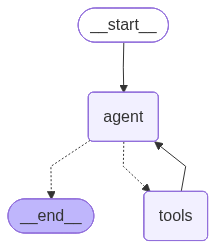

In [17]:
## 可以使用 get_graph 方法配合相应的 “draw” 方法对图进行可视化。
# 初学者提示：可视化有助于理解 ReAct 智能体内部的节点与边，
# 快速定位执行瓶颈与错误发生位置。
from IPython.display import Image, display
display(Image(main_agent.get_graph().draw_mermaid_png()))

![image-20251126163824356](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202511261638670.png)